## Baltimore Crime Data
Location, categorical, and time data is given to predict what type of crime will occur over the Baltimore area. Many features are provided for the prediction, but only the ones that would be known *before* a crime is committed are used for the prediction. The value of this data and model would be to better prepare law enforcement for the type of crime that is likely to occur based on their location and time. The features used are:
1. Time and Date
2. Location (latitude & longitude)
3. Neighborhood
4. District
5. Post
6. What type of area is within the vicinity of where the office could be called to respond to? (Premise)


There are 14 different crime types reported in the data. To improve model accuracy, crimes were grouped into 4 categories:

1. Altercations involving deadly or violent force (Assault, shooting, homicide, robbery, burglary)

2. Non-violent altercations (Theft, larceny)

3. Rape

4. Arson

In [1]:
#Import libraries in

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
#Import crime data csv file
#from google.colab import files
#crime_data = files.upload()


In [3]:
crime_data = pd.read_csv('Part1_Crime_data.csv')

In [4]:
#Start to explore data
crime_data.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1421661.420,593584.4920,1,2021/09/24 08:00:00+00,6D,500 SAINT PAUL ST APT 118,LARCENY FROM AUTO,NaN,NaN,124,CENTRAL,MOUNT VERNON,39.2959,-76.6137,"(39.2959,-76.6137)",NaN,NaN,1,NaN
1,1428629.529,592267.2422,2,2021/09/23 02:00:00+00,6D,0 N WASHINGTON ST,LARCENY FROM AUTO,NaN,NaN,212,SOUTHEAST,BUTCHER'S HILL,39.2922,-76.5891,"(39.2922,-76.5891)",NaN,NaN,1,NaN
2,1429981.578,593693.8871,3,2021/09/23 09:00:00+00,6J,400 N BRADFORD ST,LARCENY,NaN,NaN,221,SOUTHEAST,MCELDERRY PARK,39.2961,-76.5843,"(39.2961,-76.5843)",NaN,NaN,1,NaN
3,1433589.463,590796.6733,4,2021/09/23 18:27:00+00,6J,300 S EAST AVE,LARCENY,NaN,NaN,225,SOUTHEAST,HIGHLANDTOWN,39.2881,-76.5716,"(39.2881,-76.5716)",NaN,NaN,1,NaN
4,1421304.259,591033.3302,5,2021/09/23 23:00:00+00,6D,0 S CHARLES ST,LARCENY FROM AUTO,NaN,NaN,114,CENTRAL,DOWNTOWN,39.2889,-76.6150,"(39.2889,-76.615)",NaN,NaN,1,NaN


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350294 entries, 0 to 350293
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                350087 non-null  float64
 1   Y                350087 non-null  float64
 2   RowID            350294 non-null  int64  
 3   CrimeDateTime    350270 non-null  object 
 4   CrimeCode        350294 non-null  object 
 5   Location         348499 non-null  object 
 6   Description      350294 non-null  object 
 7   Inside_Outside   302508 non-null  object 
 8   Weapon           76056 non-null   object 
 9   Post             349552 non-null  object 
 10  District         349552 non-null  object 
 11  Neighborhood     349530 non-null  object 
 12  Latitude         350087 non-null  float64
 13  Longitude        350087 non-null  float64
 14  GeoLocation      350294 non-null  object 
 15  Premise          302370 non-null  object 
 16  VRIName          41597 non-null   obje

In [6]:
#X, Y, RowID, CrimeCode, Inside_Outside, Weapon, GeoLocation, Total_Incidents, and Shape are not needed for model, will be dropped.
#VRIName name has some valuable location data, but has many missing values. It is only about 11.8% of the data. We can drop this column as well.
crime_data['VRIName'].value_counts()

Tri-District    7916
Western         7200
Central         6520
Eastern 1       5390
Eastern 2       4076
Northwestern    3972
Northeastern    3518
Brooklyn        3005
Name: VRIName, dtype: int64

In [7]:
#Some of the data has very low counts in certain categories, for example, the Neighborhood column
crime_data['Neighborhood'].value_counts()

DOWNTOWN                   11760
FRANKFORD                   8291
BELAIR-EDISON               7473
BROOKLYN                    6354
SANDTOWN-WINCHESTER         5118
                           ...  
TAYLOR HEIGHTS                49
GREENMOUNT CEMETERY           40
MT PLEASANT PARK              21
BLYTHEWOOD                     7
DUNDALK MARINE TERMINAL        5
Name: Neighborhood, Length: 278, dtype: int64

In [8]:
#Drop rows that contain categories for 'Neighborhood' or 'Premise' that are very low in count so that model can learn properly
neighborhood = crime_data['Neighborhood'].value_counts().keys().tolist()
n_counts = crime_data['Neighborhood'].value_counts().tolist()

for (neighborhood, count) in zip(neighborhood, n_counts):
    if count < 100:
        idxs = crime_data[crime_data['Neighborhood'] == neighborhood].index
        crime_data.drop(idxs, inplace=True)

In [9]:
#Drop all unnecessary columns, and drop rows with missing values (relatively low amount of rows)

crime_data_df = crime_data.drop(labels = ['Latitude', 'Longitude','RowID', 'X', 'Y', 'Weapon', 'VRIName', 'Shape', 'Total_Incidents', 'CrimeCode', 'GeoLocation', 'Location', 'Inside_Outside', 'Premise'], axis = 1)
crime_data_df.dropna(inplace = True)
crime_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348630 entries, 0 to 350293
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeDateTime  348630 non-null  object
 1   Description    348630 non-null  object
 2   Post           348630 non-null  object
 3   District       348630 non-null  object
 4   Neighborhood   348630 non-null  object
dtypes: object(5)
memory usage: 16.0+ MB


<AxesSubplot:xlabel='Description', ylabel='count'>

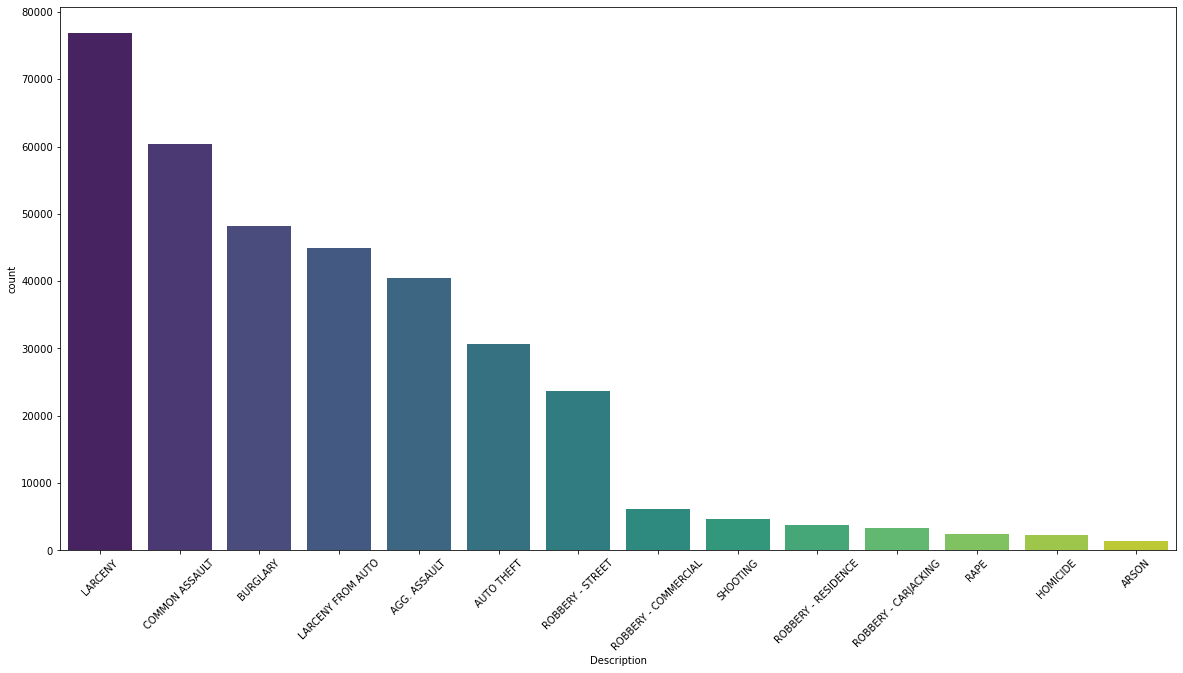

In [10]:
#Explore crime type count. Note that data is quite unbalanced.

plt.figure(figsize = (20,10))
plt.xticks(rotation=45)
sns.countplot(x='Description', data = crime_data, palette = 'viridis', order = crime_data_df['Description'].value_counts().index)

In [11]:
#Must convert 'CrimeDateTime' column into useable format
type(crime_data_df['CrimeDateTime'].iloc[0])

str

In [12]:
crime_data_df['CrimeDateTime'] = pd.to_datetime(crime_data_df['CrimeDateTime'])

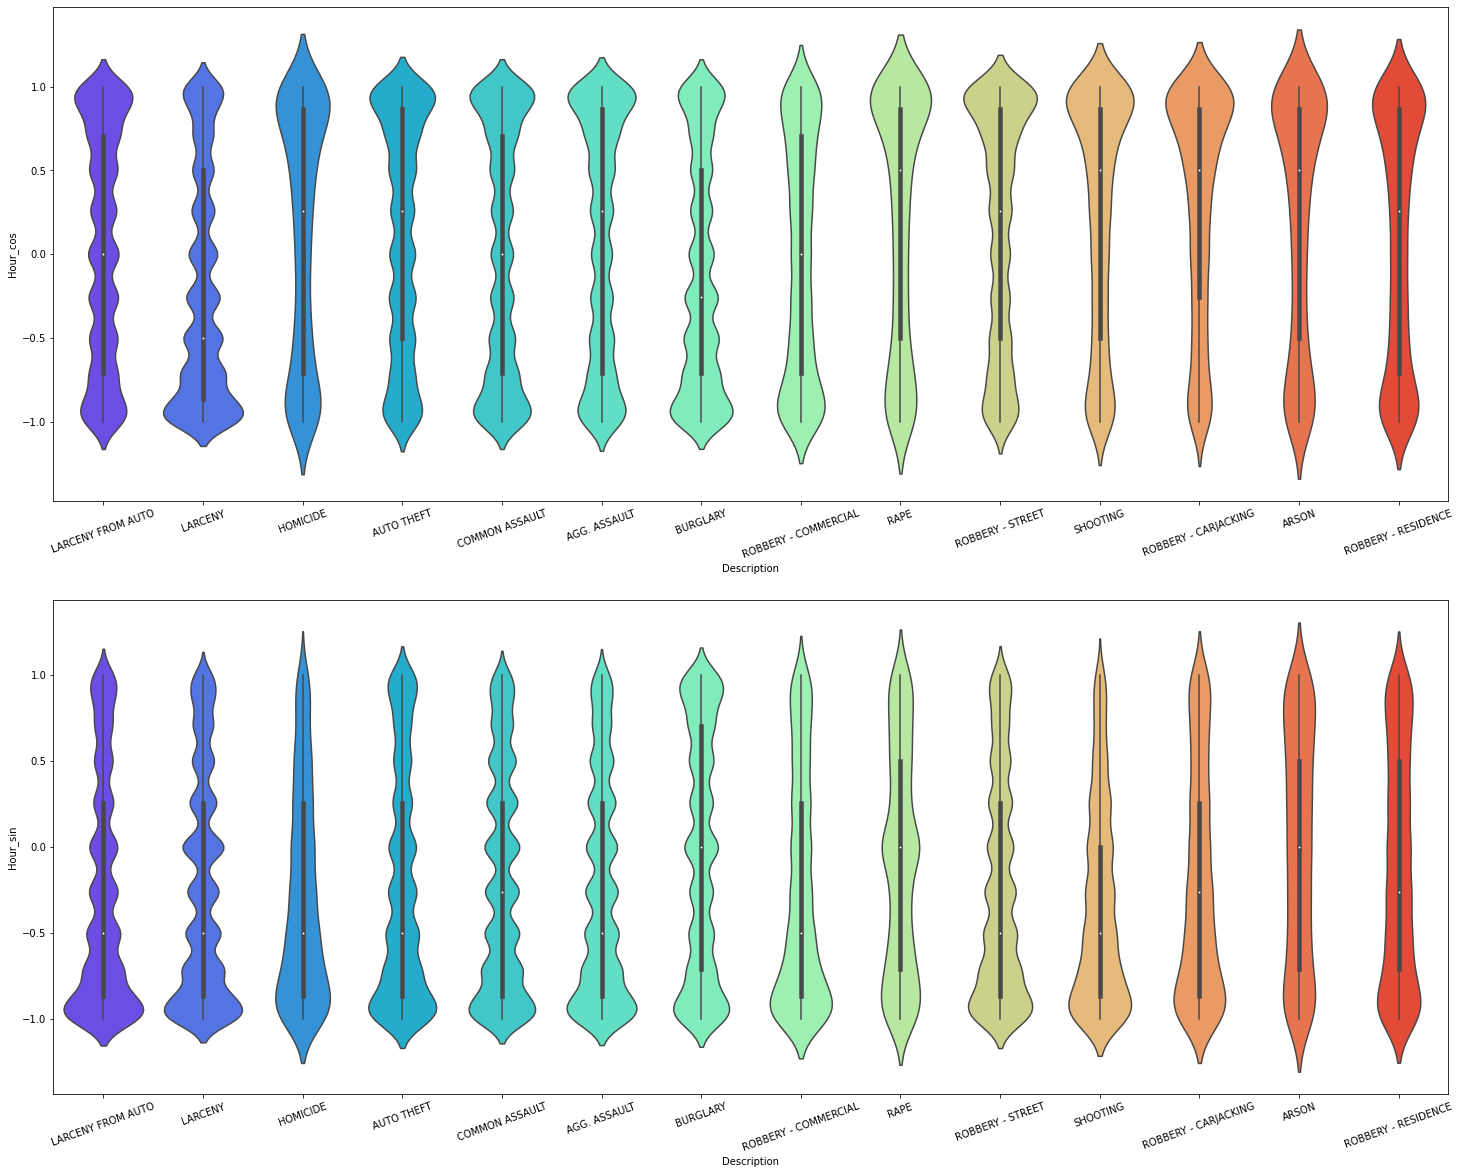

In [13]:
#Take out hour, month, and day of the week from CrimeDateTime, convert to cyclical variable through sin & cos
Hour = crime_data_df['CrimeDateTime'].apply(lambda t: t.hour)
crime_data_df['Hour_cos'] = Hour.apply(lambda x: np.cos((2*np.pi*x)/24))
crime_data_df['Hour_sin'] = Hour.apply(lambda x: np.sin((2*np.pi*x)/24))

Month =crime_data_df['CrimeDateTime'].apply(lambda t: t.month)
crime_data_df['Month_cos'] = Month.apply(lambda x: np.cos((2*np.pi*x)/12))
crime_data_df['Month_sin'] = Month.apply(lambda x: np.sin((2*np.pi*x)/12))

Day =crime_data_df['CrimeDateTime'].apply(lambda t: t.dayofweek)
crime_data_df['Day_cos'] = Day.apply(lambda x: np.cos((2*np.pi*x)/7))
crime_data_df['Day_sin'] = Day.apply(lambda x: np.cos((2*np.pi*x)/7))

#Explore data. Hour of the day helps distinguish crime type.
fig = plt.figure(figsize = (25,20))

for i in range(1, 3):
    axes = fig.add_subplot(2, 1, i)
    plt.xticks(rotation=20)
    if(i == 1):
        sns.violinplot(x='Description', y='Hour_cos', data= crime_data_df ,palette='rainbow')
    else:
        sns.violinplot(x='Description', y='Hour_sin', data= crime_data_df ,palette='rainbow')

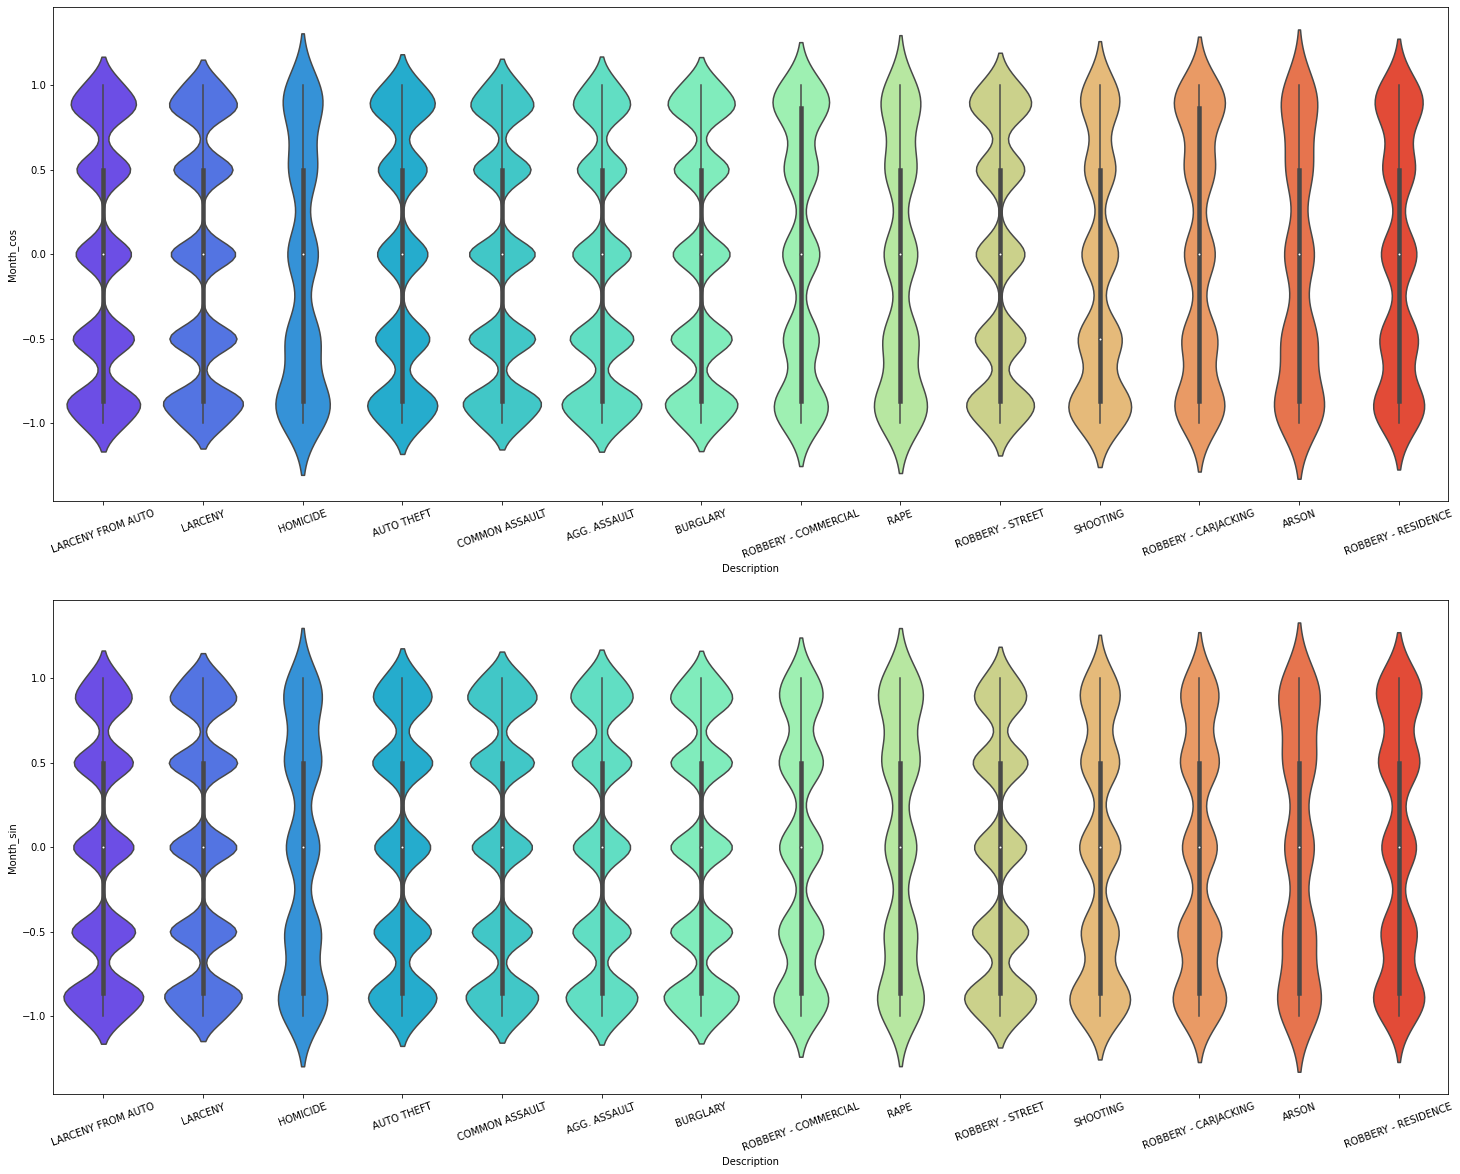

In [14]:
#Hour of the day helps distinguish crime type for some crimes
fig = plt.figure(figsize = (25,20))

for i in range(1, 3):
    axes = fig.add_subplot(2, 1, i)
    plt.xticks(rotation=20)
    if(i == 1):
        sns.violinplot(x='Description', y='Month_cos', data= crime_data_df ,palette='rainbow')
    else:
        sns.violinplot(x='Description', y='Month_sin', data= crime_data_df ,palette='rainbow')

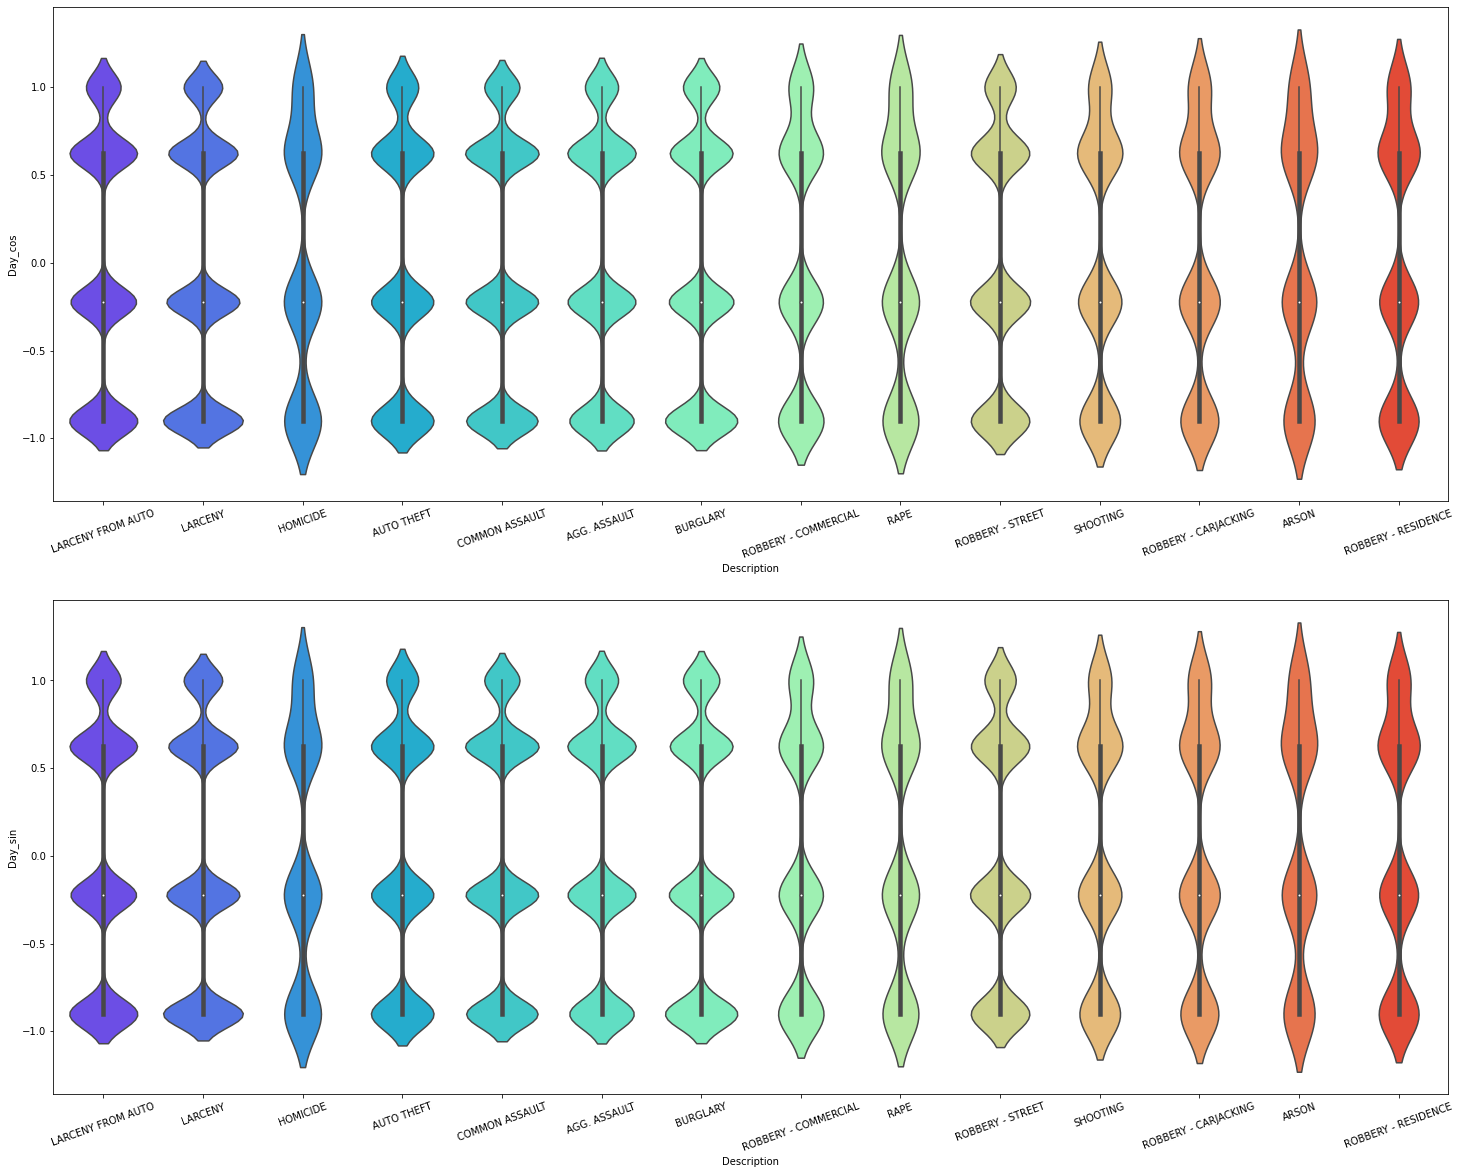

In [15]:
#Hour of the day helps distinguish crime type for some crimes
fig = plt.figure(figsize = (25,20))

for i in range(1, 3):
    axes = fig.add_subplot(2, 1, i)
    plt.xticks(rotation=20)
    if(i == 1):
        sns.violinplot(x='Description', y='Day_cos', data= crime_data_df ,palette='rainbow')
    else:
        sns.violinplot(x='Description', y='Day_sin', data= crime_data_df ,palette='rainbow')

In [16]:
#List out crime types from Description column. To increase model accuracy group like crimes together.
crime_data_df['Description'].unique()

array(['LARCENY FROM AUTO', 'LARCENY', 'HOMICIDE', 'AUTO THEFT',
       'COMMON ASSAULT', 'AGG. ASSAULT', 'BURGLARY',
       'ROBBERY - COMMERCIAL', 'RAPE', 'ROBBERY - STREET', 'SHOOTING',
       'ROBBERY - CARJACKING', 'ARSON', 'ROBBERY - RESIDENCE'],
      dtype=object)

In [17]:
#Group crimes together by similar type into 4 types
crime_data_df['Crime'] = crime_data_df['Description'].map({'ROBBERY - RESIDENCE': 0, 'HOMICIDE': 0, 'LARCENY': 2, 'AUTO THEFT': 2, 'COMMON ASSAULT': 0,
                                                          'LARCENY FROM AUTO': 2, 'AGG. ASSAULT': 0, 'BURGLARY': 0,
                                                          'ROBBERY - COMMERCIAL': 0, 'RAPE': 1, 'ROBBERY - STREET': 0, 'SHOOTING': 0,
                                                           'ROBBERY - CARJACKING': 0, 'ARSON': 3})

#Drop now unnecessary columns
crime_data_df.drop(['CrimeDateTime', 'Description'], axis = 1, inplace = True)
crime_data_df.head()

,Post,District,Neighborhood,Hour_cos,Hour_sin,Month_cos,Month_sin,Day_cos,Day_sin,Crime
0,124,CENTRAL,MOUNT VERNON,-5.000000e-01,0.866025,-1.836970e-16,-1.0,-0.900969,-0.900969,2
1,212,SOUTHEAST,BUTCHER'S HILL,8.660254e-01,0.500000,-1.836970e-16,-1.0,-0.900969,-0.900969,2
2,221,SOUTHEAST,MCELDERRY PARK,-7.071068e-01,0.707107,-1.836970e-16,-1.0,-0.900969,-0.900969,2
3,225,SOUTHEAST,HIGHLANDTOWN,-1.836970e-16,-1.000000,-1.836970e-16,-1.0,-0.900969,-0.900969,2
4,114,CENTRAL,DOWNTOWN,9.659258e-01,-0.258819,-1.836970e-16,-1.0,-0.900969,-0.900969,2


In [18]:
#Crime classes are unblanced approximately 1: 100
crime_data_df['Crime'].value_counts()

0    192510
2    152206
1      2476
3      1438
Name: Crime, dtype: int64

In [19]:
#Import preprocessing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import imblearn
from imblearn.over_sampling import SMOTE

In [20]:
#Function to pre-process data for NN model. Continuous data is scaled, dummy variables for categorical data is created, target is
#binarized, and unblanced data is oversampled.

def process_crime_attributes(df, X, y):
    continuous = ['Hour_cos', 'Hour_sin', 'Month_cos', 'Month_sin', 'Day_cos', 'Day_sin']
    cs = StandardScaler()
    Continuous_x = cs.fit_transform(X[continuous])

    cat = ['Post', 'District', 'Neighborhood']
    Categorical_x = pd.get_dummies(X, columns = cat, drop_first = True)
    
    target = 'Crime'
    lb = LabelBinarizer().fit(df[target])
    Categorical_y = lb.transform(y)

    X = np.hstack([Categorical_x, Continuous_x])
    y = Categorical_y

    oversample = SMOTE()

    X, y = oversample.fit_resample(X, y)

    return (X, y)

In [21]:
#Execute function for data and set up train test split for model
X = crime_data_df.drop('Crime', axis = 1)
y = crime_data_df['Crime']

X, y = process_crime_attributes(crime_data_df, X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 101)



KeyboardInterrupt: 

In [ ]:
#Check shapes for X and y
y_test.shape

In [ ]:
X_test.shape

In [ ]:
#Import needed libraries for tensorflow model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
#Build out model
model = Sequential()

# input layer
model.add(Dense(X_test.shape[1],  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=4,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fit and run model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=128,
          validation_data=(X_test, y_test), 
          callbacks = [early_stop]
          )

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
#Plot out losses vs. epochs
losses[['loss','val_loss']].plot()

In [ ]:
#Plot out accuracy vs. epochs
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
#Print out confusion matrix and classification report for categories

from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(x= X_test, batch_size=10, verbose=0) 
rounded_predictions = np.argmax(predictions, axis=-1) 
rounded_y_test = np.argmax(y_test, axis=-1)

print(confusion_matrix(rounded_y_test, rounded_predictions))
print('\n')
print(classification_report(rounded_y_test, rounded_predictions))


In [31]:
def process_crime_attributes_XG(df, X, y):
    continuous = ['Latitude', 'Longitude', 'Hour_cos', 'Hour_sin', 'Month_cos', 'Month_sin', 'Day_cos', 'Day_sin']
    cs = StandardScaler()
    Continuous_x = cs.fit_transform(X[continuous])

    cat = ['Post', 'District', 'Neighborhood']
    Categorical_x = pd.get_dummies(X, columns = cat, drop_first = True)
    
    target = 'Crime'
    le = LabelEncoder().fit(df[target])
    Categorical_y = le.transform(y)

    X = np.hstack([Categorical_x, Continuous_x])
    y = Categorical_y

    oversample = SMOTE()

    X, y = oversample.fit_resample(X, y)

    return (X, y)

In [ ]:
import xgboost
from xgboost import XGBClassifier

X = crime_data_df.drop('Crime', axis = 1)
y = crime_data_df['Crime']

X, y = process_crime_attributes_XG(crime_data_df, X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 101)

xgb_class = XGBClassifier(n_estimators= 1000, learning_rate= 0.1, subsample= 0.4)

xgb_class.fit(X_train, y_train, eval_metric = 'merror', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose= True)

/Users/amgadellaboudy/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-merror:0.58811
[1]	validation_0-merror:0.55036
[2]	validation_0-merror:0.52588
[3]	validation_0-merror:0.53322
[4]	validation_0-merror:0.51545
[5]	validation_0-merror:0.50414
[6]	validation_0-merror:0.49758
[7]	validation_0-merror:0.49789
[8]	validation_0-merror:0.49323
[9]	validation_0-merror:0.48590
[10]	validation_0-merror:0.48183
[11]	validation_0-merror:0.47825
[12]	validation_0-merror:0.47311
[13]	validation_0-merror:0.46898
[14]	validation_0-merror:0.46625
[15]	validation_0-merror:0.45869
[16]	validation_0-merror:0.45630
[17]	validation_0-merror:0.45347
[18]	validation_0-merror:0.45150
[19]	validation_0-merror:0.44706
[20]	validation_0-merror:0.44361
[21]	validation_0-merror:0.44137
[22]	validation_0-merror:0.43854
[23]	validation_0-merror:0.43430
[24]	validation_0-merror:0.43142


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = xgb_class.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,33),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
y_pred = knn.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))